# IMPORTANT
This notebook runs off of the kernel for the Data_Cleaning notebook, you MUST run all cells in that notebook before running this notebook and connect the Kernels.

## Final Project Submission

Please fill out:
* Student name: Sunny Liu, Brendan Polke, Colby Gates
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Praveen Gowtham
* Blog post URL: 

# Making Millions at the Box Office

# Goals

The goal of this project was to come up with three concrete recomendations for a company trying to enter into the movie industry based on the movies doing the best at the Box Office.



To answer this question we will parse the relevant data and isolate variables that contribute most to box office success.

# Data

The data we just in our analysis comes from Box Office Mojo (csv), IMDB (sql database) and The Numbers (csv). We converted these files to pandas dataframes and cleaned and sorted through data using python and pandas code in the Data_Cleaning notebook.

# Methods

## Budget and Evaluation Metric

Before discussing the relevant variables we found that may contribute to box office success it is important to understand the metric that we are using to quantify box office success. At first glance it may have been easy to just look at domestic gross totals, foreign gross totals and worldwide grossing totals but this does not account for the money spent getting the movie to the box office. For example a movie that grosses a hundred million dollars worldwide but had a production budget of ninty million has a much lower return on investment then a movie that grosses fifty million dollars but only cost ten million to make. Because of this we decided to create three metrics that we defined as domestic success, foreign success and worldwide success by taking the gross of each market (domestic, foreign and worldwide) and dividing it by the production budget. In doing so we created a standardized metric comparable across all movies no matter the budget. If this new metric was greater then 1 it meant that the movies made more money then they spent, i.e the larger the number the more profitable compared to the budget the movie was.

## Additional Metrics

## Budget

One of the first variables we chose to examine was the budget of a given movie. It felt clear to us that not all movies are made equal. A hundred million dollar movie and the variables influencing it's success feels much different then a fifty thousand dollar movie. After a little bit of outside research on industry standards we decided to split movies into three categories: low budget movies, mid budget movies and high budget movies. We defined low budget movies as movies with a production budget less then five million dollars. Mid budget movies are defined as movies with a budget between five and fifty million dollars and high budget movies with budgets greater then fifty million dollars.

## Runtime

The next metric we looked at was the runtime of movies. Movies these days can range any where from forty five minutes to the new trend of the three plus hour movie. Is there a sweet spot for profitable movies? Are people more likely to spend the money to watch to movie if it's short and sweet? Or are they more likely to gravitate towards the longer movie because they want the most bang for their buck? In an attempt to answer these questions we ran analysis on the runtime of movies compared to the ROI to see if we could gain any insight.

## Genre

Another metric we choose to examine was the genre of movie. It is not unusual for someone to look at the genre of a movie and either immediately decide they don't want to watch it (rom com or horror movie maybe), while there are other genres where people gravitate towards. Is this an individual trend or are there larger trends in the types of movies people enjoy? Is there a particular genre of movie that does the best at the box office? Are there certain genres you want to avoid when making a movie? 

## Personel

The last metric we choose to look at was specific personel and how certain writers, producers and actors might effect box office outcomes of movies. There are certain people whom, if they see that perhaps Brad Pitt is in a movie will watch it no matter what. Are there certain individuals with the midas touch where every movie they participate in seems to be a success? 

# Results

## Budget

After dividing films into our three categories of low, medium and high budget films we looked at descriptive statistics across these three categories to see if there are signifigant differences between them. Below is code that creates a table of descritive statistics for each bidget level 

In [17]:
low_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1104.000000,76.000000,1104.000000
mean,9.171927,7.435801,13.057042
std,59.100067,24.142682,66.335127
min,0.000000,0.004550,0.000026
25%,0.075408,0.289624,0.212978
50%,0.941282,1.833333,1.686642
75%,4.895456,4.452778,7.058571
max,1800.000000,202.000000,1800.000000


In [18]:
mid_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,2975.000000,592.000000,2975.000000
mean,1.743540,1.748970,3.072227
std,2.633854,2.738256,4.748629
min,0.000000,0.000030,0.000125
25%,0.318128,0.357024,0.625621
50%,0.997365,0.927857,1.722419
75%,2.157811,2.068750,3.609725
max,41.908910,30.578947,75.520507


In [19]:
high_budget.describe().iloc[:,-3:]

,domestic_success,foreign_success,WW_success
count,1073.000000,341.000000,1073.000000
mean,1.162799,2.023427,2.817022
std,0.890666,1.569798,2.224842
min,0.000000,0.000004,0.007943
25%,0.556753,0.986667,1.295164
50%,0.934403,1.672727,2.284781
75%,1.512535,2.697143,3.667582
max,6.303232,12.494545,16.489089


Text(0, 0.5, 'Worldwide Success')

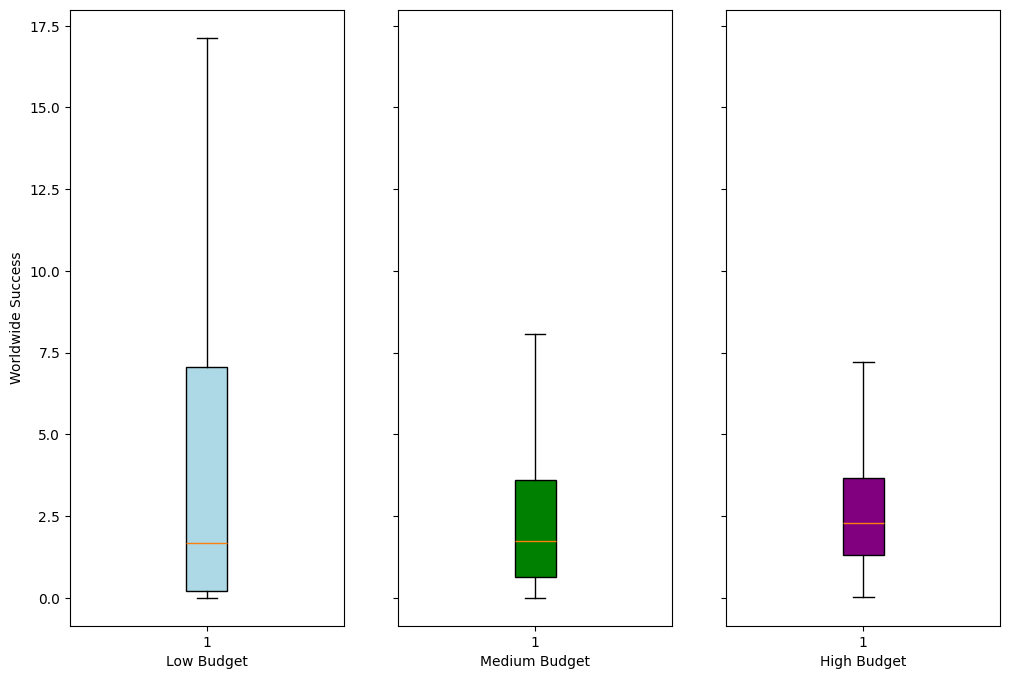

In [70]:
fig, ax = plt.subplots(1,3, figsize = (12,8), sharey = True)

bplot1 = ax[0].boxplot(low_budget['WW_success'], showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "lightblue"))
ax[0].set_xlabel('Low Budget')

bplot2 = ax[1].boxplot(mid_budget['WW_success'],showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "green"))
ax[1].set_xlabel('Medium Budget')

bplot3 = ax[2].boxplot(high_budget['WW_success'],showfliers=False, patch_artist = True,
           boxprops = dict(facecolor = "purple"))
ax[2].set_xlabel('High Budget')

ax[0].set_ylabel('Worldwide Success')



There is a clear difference across these three categories. The low budget films means across all three categories of success by quite a bit as well as a signifigantly larger standard deviation. In contrast with the large means, the medians across the three metrics for low budget films are quite similar if not slightly smaller then both the mid and high budget films. All of this goes to suggest that low budget films seem to be a high risk high reward type of investment.

Medium budget films are have similar means and medians compared to the high budget films but larger standard deviations and in turn signifigantly larger maximums. This suggested to us the while being a safer bet then the low budget films the variablity in success seen in these films compared to the high bugdet films makes for a slightly riskier invesetment with slightly higher upside.

Lastly, high budget films have the smallest means of the three categories (except for foriegn success), as well as the smallest standard deviation making for the safest movie to invest in.

## Runtime

The following code looks at a distribution of runtimes for each budget level as well as creating 95% confidence intervals for the mean of each. Importantly the movies displayed are just the movies that were able to make money.

Text(0.5, 0, 'Runtime (minutes)')

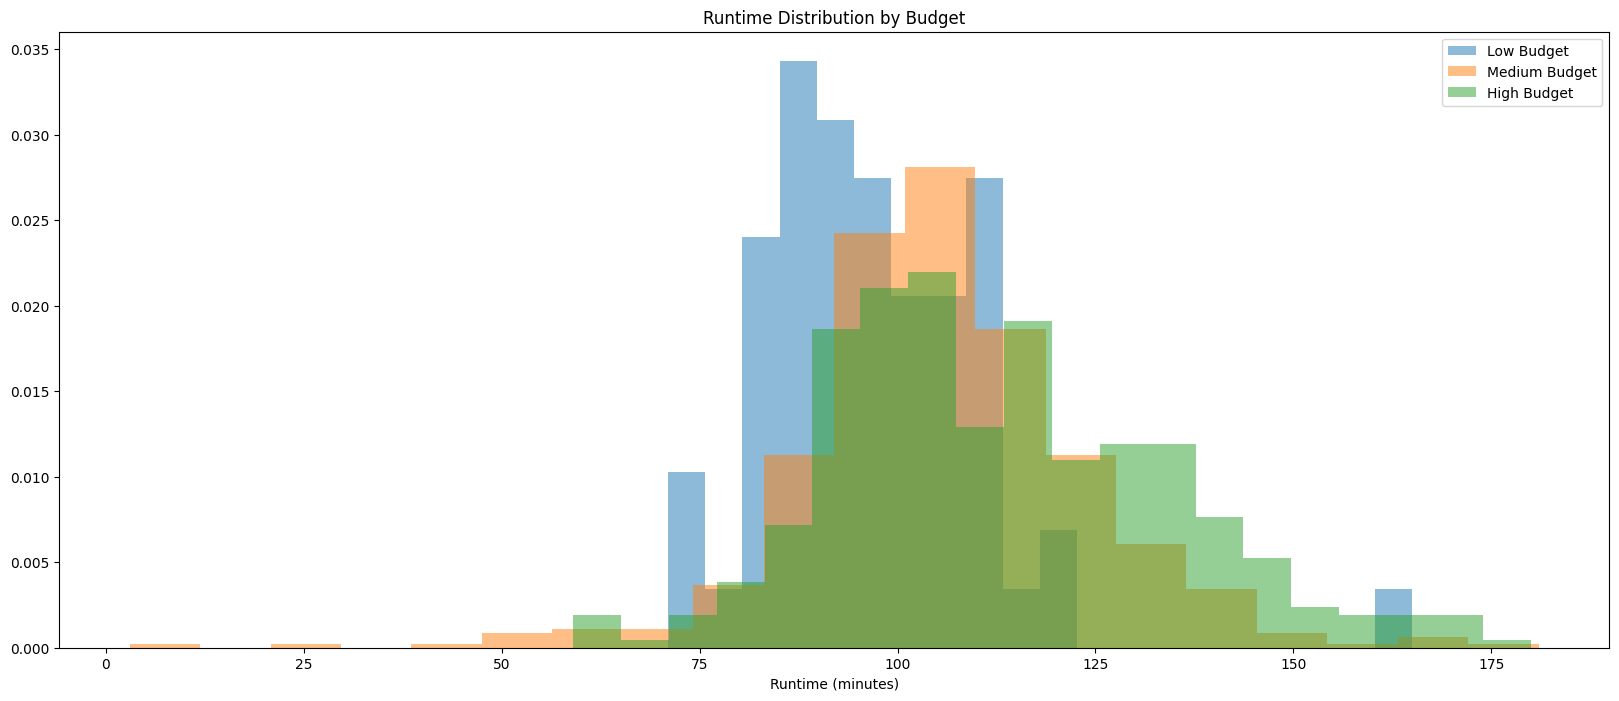

In [20]:
fig, ax = plt.subplots(figsize = (20,8))

ax.hist(low_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'Low Budget')


ax.hist(mid_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'Medium Budget')
ax.hist(high_budget_ratings_moneymaker['runtime_minutes'], alpha = 0.5, bins = 20, density = True, label = 'High Budget')
ax.legend(loc='upper right')
ax.set_title('Runtime Distribution by Budget')
ax.set_xlabel('Runtime (minutes)')


In [21]:
x_bar = np.mean(low_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(low_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(low_budget_ratings_moneymaker['runtime_minutes']))
print('Low Budget Sample mean:', x_bar)
print('Low Budget Sample standard deviation:', s)
print('Low Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(low_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Low Budget Sample mean: 96.74193548387096
Low Budget Sample standard deviation: 14.54437583135276
Low Budget Estimated standard error: 1.8324191154484621


(93.0789818663082, 100.40488910143372)

In [22]:
x_bar = np.mean(mid_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(mid_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(mid_budget_ratings_moneymaker['runtime_minutes']))
print('Mid Budget Sample mean:', x_bar)
print('Mid Budget Sample standard deviation:', s)
print('Mid Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(mid_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

Mid Budget Sample mean: 105.67630057803468
Mid Budget Sample standard deviation: 18.327122889098113
Mid Budget Estimated standard error: 0.7983420122265681


(104.10797028891557, 107.2446308671538)

In [23]:
x_bar = np.mean(high_budget_ratings_moneymaker['runtime_minutes'])
s = np.std(high_budget_ratings_moneymaker['runtime_minutes'], ddof = 1)
se = s/np.sqrt(len(high_budget_ratings_moneymaker['runtime_minutes']))
print('High Budget Sample mean:', x_bar)
print('High Budget Sample standard deviation:', s)
print('High Budget Estimated standard error:', se)
stats.t.interval(confidence = 0.95,                              
                 df= len(high_budget_ratings_moneymaker['runtime_minutes'])-1,             
                 loc = x_bar,                               
                 scale = se)    

High Budget Sample mean: 113.0635838150289
High Budget Sample standard deviation: 21.285676013482064
High Budget Estimated standard error: 1.129726382616637


(110.84176461202, 115.28540301803781)

Text(0.5, 0, 'Runtime (minutes)')

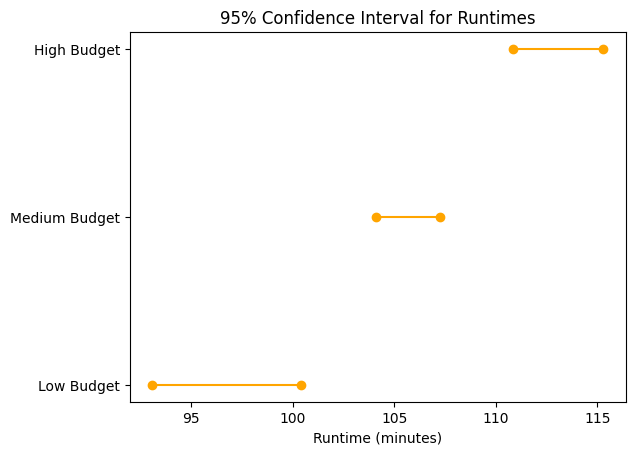

In [52]:
data_dict = {}
data_dict['category'] = ['Low Budget','Medium Budget','High Budget']
data_dict['lower'] = [93.07,104.11,110.84]
data_dict['upper'] = [100.40, 107.24, 115.29]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))

plt.title('95% Confidence Interval for Runtimes')
plt.xlabel('Runtime (minutes)')

Looking at the three distributions runtimes seem to be more concentrated the smaller the budget and as you go up in category the distribution widens. Although they all seem to be centralized around a similar point the analysis of the mean, standard deviation and standard error as well as the 95% confidence interval reconfirm what is visually aparent. The cheaper the movie the shorter the money making movies tend to be with much less leniance for different run times while as the movies get larger in scale there is more wiggle room for the runtime of a successful movie and movies tend to be longer.

## Language

The next variable we looked at was langauge, specificially how language effected the foreign box office succes of films

In [24]:
median_lowbudget_lang = reg_lang_low_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_lowbudget_lang = median_lowbudget_lang.reset_index()

median_lowbudget_lang = median_lowbudget_lang[median_lowbudget_lang['language'].isin(low_budget_language)]
median_lowbudget_lang

,language,median_foreignratio,rng
1,Croatian,9.866667,28.361905
5,English,4.371429,31.566000
6,French,4.250000,201.930000
7,Turkish,3.700000,201.930000
8,Bulgarian,3.650000,48.406667
9,Hebrew,3.562500,48.321250


In [25]:
median_midbudget_lang = reg_lang_mid_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)

median_midbudget_lang = median_midbudget_lang.reset_index()

median_midbudget_lang = median_midbudget_lang[median_midbudget_lang['language'].isin(mid_budget_language)]
median_midbudget_lang

,language,median_foreignratio,rng
4,Croatian,2.737679,13.535567
7,Cantonese,2.055000,2.775000
8,Mandarin Chinese,2.055000,30.258947
9,Spanish,1.876000,5.638462
10,Persian,1.711170,9.019286
11,Bosnian,1.696825,8.451000
13,Swedish,1.515000,10.648571
14,Catalan,1.427464,9.491176
15,Hebrew,1.374328,26.582458
16,English,1.331429,26.581359


In [26]:
median_highbudget_lang = reg_lang_high_budget.groupby('language').agg(
  median_foreignratio=('foreign_success', 'median'),
  rng=("foreign_success", lambda x: (max(x) - min(x)))).sort_values('median_foreignratio', ascending = False)
median_highbudget_lang = median_highbudget_lang.reset_index()

median_highbudget_lang = median_highbudget_lang[median_highbudget_lang['language'].isin(high_budget_language)]
median_highbudget_lang

,language,median_foreignratio,rng
4,Persian,2.731250,10.269329
5,Mandarin Chinese,2.613821,4.841333
6,Hindi,2.579456,2.611456
7,Dutch,2.536667,6.363152
8,Serbian,2.440107,11.464069
10,Cantonese,2.315636,3.377273
11,Catalan,2.280000,10.505027
12,English,2.221348,12.494541
16,Bosnian,2.019714,2.788000
19,Croatian,1.776842,3.720712


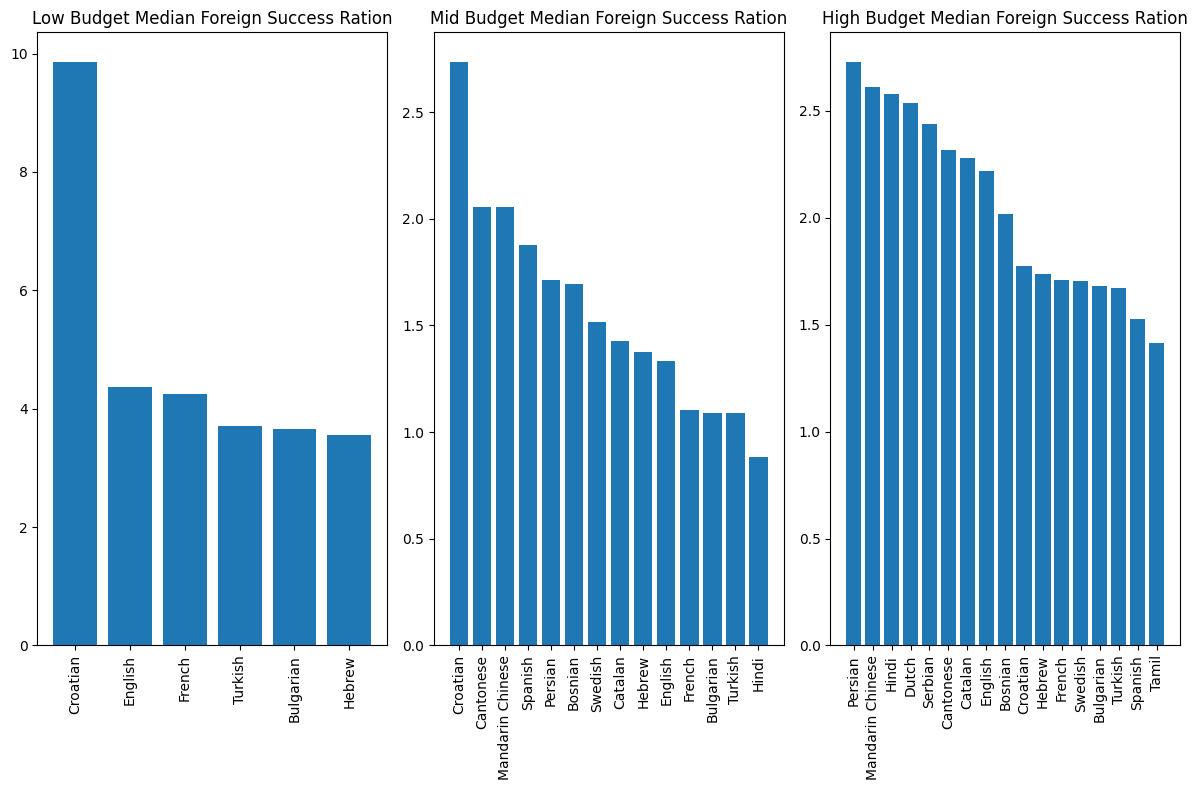

In [27]:
fig, ax = plt.subplots(1,3, figsize = (12,8))

ax[0].bar(median_lowbudget_lang['language'], median_lowbudget_lang['median_foreignratio'])

ax[1].bar(median_midbudget_lang['language'], median_midbudget_lang['median_foreignratio'])

ax[2].bar(median_highbudget_lang['language'], median_highbudget_lang['median_foreignratio'])

ax[1].tick_params(axis='x', rotation=90)
ax[0].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)

ax[0].set_title('Low Budget Median Foreign Success Ration')

ax[1].set_title('Mid Budget Median Foreign Success Ration')

ax[2].set_title('High Budget Median Foreign Success Ration')

fig.tight_layout()

## Genre

In [3]:
import matplotlib
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [4]:
gross = pd.read_csv('Data/bom.movie_gross.csv')

tmdb = pd.read_csv('Data/tmdb.movies.csv')

budget = pd.read_csv('Data/tn.movie_budgets.csv')
#budget = budget.set_index('id')

movie_info = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')

reviews = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding='windows-1252')

In [5]:
budget.id.value_counts()

4      58
53     58
61     58
65     58
69     58
       ..
85     57
100    57
96     57
92     57
97     57
Name: id, Length: 100, dtype: int64

In [6]:
#cleaning data - removing movies before 1990 and any we are missing box office data from
gross['foreign_gross'].fillna(0, inplace = True)
gross['domestic_gross'].fillna(0, inplace = True)
gross['studio'].fillna('N/A', inplace = True)
gross.isna().sum()
gross_90s_on = gross[gross['year'] >= 1990]


gross_90s_on.info()
gross_90s_on = gross_90s_on.replace(',','', regex=True)
gross_90s_on.foreign_gross = gross_90s_on.foreign_gross.astype(np.float64)
money_made_gross_90s = gross_90s_on[(gross_90s_on['domestic_gross'] > 0) & (gross_90s_on['foreign_gross'] > 0)]
money_made_gross_90s

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [7]:
#cleaning 90s and removing string characters
budget_90s_on = budget[budget.release_date >= '1990-01-01']
budget_90s_on[budget_90s_on.columns[3:]] = budget_90s_on[budget_90s_on.columns[3:]].replace('[\$,]', '', regex=True).astype(np.int64)

money_making_budget_90s_on = budget_90s_on[budget_90s_on['worldwide_gross'] > 0]
money_making_budget_90s_on


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [8]:
money_made_gross_90s

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [9]:
#combining dataframes

budget_gross_cleaned = pd.merge(money_made_gross_90s, money_making_budget_90s_on, how = 'outer', left_on = 'title', right_on = 'movie')

In [10]:
budget_gross_cleaned

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,47.0,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010.0,38.0,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010.0,27.0,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...,...,...
6355,NaN,NaN,NaN,NaN,NaN,76.0,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04
6356,NaN,NaN,NaN,NaN,NaN,77.0,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02
6357,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
6358,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [11]:
cleaned = budget_gross_cleaned.title.fillna(budget_gross_cleaned.movie)
budget_gross_cleaned.title = cleaned
budget_gross_cleaned.isna().sum()
budget_gross_cleaned = budget_gross_cleaned.drop('movie', axis=1)


In [12]:
budget_gross_cleaned.isna().sum()

title                   0
studio               4345
domestic_gross_x     4345
foreign_gross        4345
year                 4345
id                    945
release_date          945
production_budget     945
domestic_gross_y      945
worldwide_gross       945
dtype: int64

In [13]:
cleaned = budget_gross_cleaned.domestic_gross_y.fillna(budget_gross_cleaned.domestic_gross_x)
budget_gross_cleaned.domestic_gross_y = cleaned
budget_gross_cleaned.isna().sum()

title                   0
studio               4345
domestic_gross_x     4345
foreign_gross        4345
year                 4345
id                    945
release_date          945
production_budget     945
domestic_gross_y        0
worldwide_gross       945
dtype: int64

In [14]:
budget_gross_cleaned = budget_gross_cleaned.drop('domestic_gross_x', axis=1)


In [15]:
budget_gross_cleaned

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,691300000.0,2010.0,NaN,NaN,NaN,334200000.0,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000.0,2010.0,NaN,NaN,NaN,296000000.0,NaN
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
6355,Cavite,NaN,NaN,NaN,76.0,"May 26, 2006",7000.0,70071.0,7.164400e+04
6356,The Mongol King,NaN,NaN,NaN,77.0,"Dec 31, 2004",7000.0,900.0,9.000000e+02
6357,Following,NaN,NaN,NaN,79.0,"Apr 2, 1999",6000.0,48482.0,2.404950e+05
6358,Return to the Land of Wonders,NaN,NaN,NaN,80.0,"Jul 13, 2005",5000.0,1338.0,1.338000e+03


In [16]:
budget_gross_cleaned = budget_gross_cleaned[budget_gross_cleaned['production_budget'].notna()]

In [17]:
budget_gross_cleaned.isna().sum()

title                   0
studio               4345
foreign_gross        4345
year                 4345
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
dtype: int64

In [18]:
cleaned = budget_gross_cleaned.foreign_gross.fillna(budget_gross_cleaned.worldwide_gross - budget_gross_cleaned.domestic_gross_y )
budget_gross_cleaned.foreign_gross = cleaned

In [19]:
budget_gross_cleaned.isna().sum()

title                   0
studio               4345
foreign_gross           0
year                 4345
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
dtype: int64

In [20]:
budget_gross_cleaned

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...
6355,Cavite,NaN,1573.0,NaN,76.0,"May 26, 2006",7000.0,70071.0,7.164400e+04
6356,The Mongol King,NaN,0.0,NaN,77.0,"Dec 31, 2004",7000.0,900.0,9.000000e+02
6357,Following,NaN,192013.0,NaN,79.0,"Apr 2, 1999",6000.0,48482.0,2.404950e+05
6358,Return to the Land of Wonders,NaN,0.0,NaN,80.0,"Jul 13, 2005",5000.0,1338.0,1.338000e+03


In [21]:
budget_gross_cleaned.isna().sum()

title                   0
studio               4345
foreign_gross           0
year                 4345
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
dtype: int64

In [22]:
titles = list(budget_gross_cleaned.title)

In [23]:
tmdb = tmdb[tmdb['original_title'].isin(titles)]


In [24]:
#success ratios

budget_gross_cleaned['domestic_success'] = (budget_gross_cleaned['domestic_gross_y']/budget_gross_cleaned['production_budget'])

budget_gross_cleaned['foreign_success'] = (budget_gross_cleaned['foreign_gross']/budget_gross_cleaned['production_budget'])

budget_gross_cleaned['WW_success'] = (budget_gross_cleaned['worldwide_gross']/budget_gross_cleaned['production_budget'])
                                        

In [25]:
budget_gross_cleaned.sort_values('id')

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
2405,Timeline,NaN,7222445.0,NaN,1.0,"Nov 26, 2003",80000000.0,19480739.0,26703184.0,0.243509,0.090281,0.333790
1092,Dumb and Dumber To,Uni.,83600000.0,2014.0,1.0,"Nov 14, 2014",40000000.0,86208010.0,156553592.0,2.155200,2.090000,3.913840
3234,Jersey Girl,NaN,11800000.0,NaN,1.0,"Mar 26, 2004",35000000.0,25266129.0,37066129.0,0.721889,0.337143,1.059032
1074,Mr. Peabody & Sherman,Fox,164200000.0,2014.0,1.0,"Mar 7, 2014",145000000.0,111506430.0,269806430.0,0.769010,1.132414,1.860734
5893,Stolen Summer,NaN,0.0,NaN,1.0,"Mar 22, 2002",1500000.0,119841.0,119841.0,0.079894,0.000000,0.079894
...,...,...,...,...,...,...,...,...,...,...,...,...
645,The Impossible,LG/S,161300000.0,2012.0,100.0,"Dec 21, 2012",40000000.0,19019882.0,169590606.0,0.475497,4.032500,4.239765
4884,The Ultimate Gift,NaN,0.0,NaN,100.0,"Mar 9, 2007",9000000.0,3438735.0,3438735.0,0.382082,0.000000,0.382082
5598,Teen Wolf Too,NaN,0.0,NaN,100.0,"Nov 20, 1987",3000000.0,7888000.0,7888000.0,2.629333,0.000000,2.629333
4800,Parkland,NaN,974914.0,NaN,100.0,"Oct 4, 2013",10000000.0,641439.0,1616353.0,0.064144,0.097491,0.161635


In [26]:
#only movies that made money domestically
domestic_cleaned = budget_gross_cleaned[budget_gross_cleaned['domestic_success'] > 1]

In [27]:
domestic_cleaned

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,2.075024,3.260000,5.344398
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,1.828601,3.348125,5.222029
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,1.446890,3.114545,4.583301
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,4.419585,5.852941,10.383865
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08,1.837843,1.832353,3.653861
...,...,...,...,...,...,...,...,...,...,...,...,...
6353,El Mariachi,NaN,1008.0,NaN,74.0,"Feb 26, 1993",7000.0,2040920.0,2.041928e+06,291.560000,0.144000,291.704000
6354,Primer,NaN,417166.0,NaN,75.0,"Oct 8, 2004",7000.0,424760.0,8.419260e+05,60.680000,59.595143,120.275143
6355,Cavite,NaN,1573.0,NaN,76.0,"May 26, 2006",7000.0,70071.0,7.164400e+04,10.010143,0.224714,10.234857
6357,Following,NaN,192013.0,NaN,79.0,"Apr 2, 1999",6000.0,48482.0,2.404950e+05,8.080333,32.002167,40.082500


In [28]:
#only movies that made money abroad
foreign_cleaned = budget_gross_cleaned[budget_gross_cleaned['foreign_success'] > 1]
foreign_cleaned

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,2.075024,3.260000,5.344398
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,1.828601,3.348125,5.222029
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,1.446890,3.114545,4.583301
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,4.419585,5.852941,10.383865
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08,1.837843,1.832353,3.653861
...,...,...,...,...,...,...,...,...,...,...,...,...
6324,George Washington,NaN,100906.0,NaN,28.0,"Oct 27, 2000",42000.0,241816.0,3.427220e+05,5.757524,2.402524,8.160048
6334,Clerks,NaN,820812.0,NaN,43.0,"Oct 19, 1994",27000.0,3073428.0,3.894240e+06,113.830667,30.400444,144.231111
6340,Exeter,NaN,489792.0,NaN,49.0,"Sep 1, 2015",25000.0,0.0,4.897920e+05,0.000000,19.591680,19.591680
6354,Primer,NaN,417166.0,NaN,75.0,"Oct 8, 2004",7000.0,424760.0,8.419260e+05,60.680000,59.595143,120.275143


In [29]:
#taking only movies that made money
WW_cleaned =  budget_gross_cleaned[budget_gross_cleaned['WW_success'] > 1]
WW_cleaned

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,2.075024,3.260000,5.344398
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,1.828601,3.348125,5.222029
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,1.446890,3.114545,4.583301
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,4.419585,5.852941,10.383865
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08,1.837843,1.832353,3.653861
...,...,...,...,...,...,...,...,...,...,...,...,...
6353,El Mariachi,NaN,1008.0,NaN,74.0,"Feb 26, 1993",7000.0,2040920.0,2.041928e+06,291.560000,0.144000,291.704000
6354,Primer,NaN,417166.0,NaN,75.0,"Oct 8, 2004",7000.0,424760.0,8.419260e+05,60.680000,59.595143,120.275143
6355,Cavite,NaN,1573.0,NaN,76.0,"May 26, 2006",7000.0,70071.0,7.164400e+04,10.010143,0.224714,10.234857
6357,Following,NaN,192013.0,NaN,79.0,"Apr 2, 1999",6000.0,48482.0,2.404950e+05,8.080333,32.002167,40.082500


In [30]:
#bucketing budgets
low_budget = WW_cleaned[WW_cleaned['production_budget'] < 5000000]
mid_budget = WW_cleaned[(WW_cleaned['production_budget'] > 5000000) & (budget_gross_cleaned['production_budget'] < 50000000)]
high_budget = WW_cleaned[budget_gross_cleaned['production_budget'] > 50000000]

In [31]:
WW_Lost = budget_gross_cleaned[budget_gross_cleaned['WW_success'] < 1]
WW_Lost.head()

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
20,Robin Hood,Uni.,216400000.0,2010.0,9.0,"Nov 21, 2018",99000000.0,30824628.0,84747441.0,0.311360,2.185859,0.856035
51,The Wolfman,Uni.,77800000.0,2010.0,91.0,"Feb 12, 2010",150000000.0,62189884.0,142634358.0,0.414599,0.518667,0.950896
68,Green Zone,Uni.,59800000.0,2010.0,98.0,"Mar 12, 2010",100000000.0,35497337.0,97523020.0,0.354973,0.598000,0.975230
122,Agora,NM,38400000.0,2010.0,49.0,"May 28, 2010",70000000.0,619423.0,38992292.0,0.008849,0.548571,0.557033
137,Splice,WB,9800000.0,2010.0,63.0,"Jun 4, 2010",30000000.0,17010170.0,28542494.0,0.567006,0.326667,0.951416


In [33]:
budget_gross_cleaned.head()

,title,studio,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross,domestic_success,foreign_success,WW_success
0,Toy Story 3,BV,652000000.0,2010.0,47.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,2.075024,3.260000,5.344398
3,Inception,WB,535700000.0,2010.0,38.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,1.828601,3.348125,5.222029
4,Shrek Forever After,P/DW,513900000.0,2010.0,27.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,1.446890,3.114545,4.583301
5,The Twilight Saga: Eclipse,Sum.,398000000.0,2010.0,53.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,4.419585,5.852941,10.383865
6,Iron Man 2,Par.,311500000.0,2010.0,15.0,"May 7, 2010",170000000.0,312433331.0,6.211564e+08,1.837843,1.832353,3.653861


In [32]:
path = 'Data/im.db'
conn = sqlite3.connect(path)
movie_genres = """
    SELECT * 
    FROM movie_basics
    
    """

Genres_df=pd.read_sql(movie_genres, conn)

Genres_df['title'] = Genres_df['primary_title']

Genres_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera


In [39]:
merged_genres = pd.merge(WW_cleaned, Genres_df, on='title')

merged_genres = merged_genres.drop(columns=['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'year','studio' ])

merged_genres = merged_genres.drop(columns = ['release_date','foreign_gross','production_budget', 'domestic_gross_y' ])
merged_genres

NameError: name 'Genres_df' is not defined

In [34]:
#splitting the genres into a list
merged_genres['genres'] = merged_genres['genres'].str.split(",")

merged_genres

,title,id,worldwide_gross,domestic_success,foreign_success,WW_success,genres
0,Toy Story 3,47.0,1.068880e+09,2.075024,3.260000,5.344398,"[Adventure, Animation, Comedy]"
1,Inception,38.0,8.355246e+08,1.828601,3.348125,5.222029,"[Action, Adventure, Sci-Fi]"
2,Shrek Forever After,27.0,7.562447e+08,1.446890,3.114545,4.583301,"[Adventure, Animation, Comedy]"
3,The Twilight Saga: Eclipse,53.0,7.061028e+08,4.419585,5.852941,10.383865,"[Adventure, Drama, Fantasy]"
4,Iron Man 2,15.0,6.211564e+08,1.837843,1.832353,3.653861,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...
2250,Exeter,49.0,4.897920e+05,0.000000,19.591680,19.591680,[Horror]
2251,Exeter,49.0,4.897920e+05,0.000000,19.591680,19.591680,None
2252,Clean,67.0,1.387110e+05,13.871100,0.000000,13.871100,"[Comedy, Drama, Horror]"
2253,Cure,68.0,9.459600e+04,9.459600,0.000000,9.459600,[Drama]


In [35]:
#breaking out the movie genres into multiple rows
exploded=merged_genres.explode('genres')
exploded= exploded[exploded['genres'].notna()]
exploded

,title,id,worldwide_gross,domestic_success,foreign_success,WW_success,genres
0,Toy Story 3,47.0,1.068880e+09,2.075024,3.260000,5.344398,Adventure
0,Toy Story 3,47.0,1.068880e+09,2.075024,3.260000,5.344398,Animation
0,Toy Story 3,47.0,1.068880e+09,2.075024,3.260000,5.344398,Comedy
1,Inception,38.0,8.355246e+08,1.828601,3.348125,5.222029,Action
1,Inception,38.0,8.355246e+08,1.828601,3.348125,5.222029,Adventure
...,...,...,...,...,...,...,...
2250,Exeter,49.0,4.897920e+05,0.000000,19.591680,19.591680,Horror
2252,Clean,67.0,1.387110e+05,13.871100,0.000000,13.871100,Comedy
2252,Clean,67.0,1.387110e+05,13.871100,0.000000,13.871100,Drama
2252,Clean,67.0,1.387110e+05,13.871100,0.000000,13.871100,Horror


In [38]:
unique_gens = exploded['genres'].unique()

unique_gens

NameError: name 'exploded' is not defined

In [36]:
d= []
for i in unique_gens:
    genre=[i]
    x=1
    name = exploded[exploded['genres'].isin(genre)]
    x=x+1
    d.append(name)
d[0]

NameError: name 'unique_gens' is not defined

In [37]:
#getting a list of means
Adventure_mean = d[0]['WW_success'].mean()
Animation_mean = d[1]['WW_success'].mean()
Comedy_mean = d[2]['WW_success'].mean()
Action_mean = d[3]['WW_success'].mean()
SciFi_mean = d[4]['WW_success'].mean()
Drama_mean = d[5]['WW_success'].mean()
Fantasy_mean = d[6]['WW_success'].mean()
Family_mean = d[7]['WW_success'].mean()
Thriller_mean = d[8]['WW_success'].mean()
History_mean = d[9]['WW_success'].mean()
Romance_mean = d[10]['WW_success'].mean()
Horror_mean = d[11]['WW_success'].mean()
Mystery_mean = d[12]['WW_success'].mean()
Western_mean = d[13]['WW_success'].mean()
Biography_mean = d[14]['WW_success'].mean()
Documentary_mean = d[15]['WW_success'].mean()
Crime_mean = d[16]['WW_success'].mean()
Sport_mean = d[17]['WW_success'].mean()
War_mean  = d[18]['WW_success'].mean()
Music_mean  = d[19]['WW_success'].mean()
Musical_mean  = d[20]['WW_success'].mean()
News_mean = d[21]['WW_success'].mean()

mean_list = [Adventure_mean,
Animation_mean,
Comedy_mean,
Action_mean,
SciFi_mean,
Drama_mean,
Fantasy_mean,
Family_mean,
Thriller_mean,
History_mean,
Romance_mean,
Horror_mean,
Mystery_mean,
Western_mean,
Biography_mean,
Documentary_mean,
Crime_mean,
Sport_mean,
War_mean,
Music_mean,
Musical_mean,
News_mean]
mean_list

top_mean_list = [x for x in mean_list if x > 5]
top_mean_list

top_genre_list = ['Drama', 'Thriller',  'Romance' , 'Horror','Mystery' , 'Western', 'Sport', 'Music']
print(mean_list)
print(top_mean_list)

IndexError: list index out of range

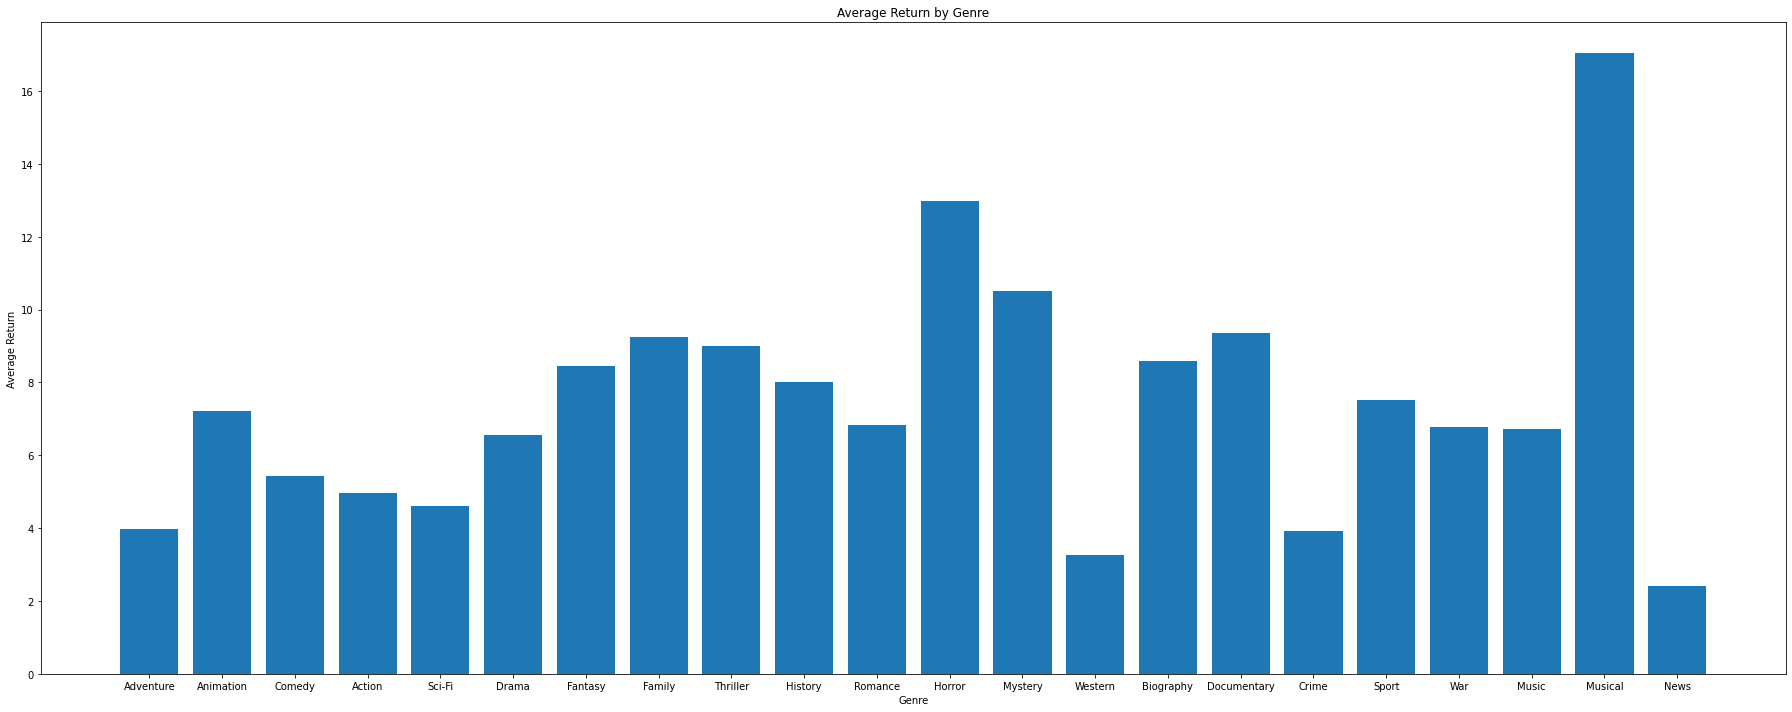

In [39]:
title = 'Average Return by Genre'
Genre_Label = 'Genre'
Average_Return = 'Average Return'

figure, ax = plt.subplots(figsize=(25, 10))

Genres = unique_gens
Returns = mean_list

xtick = 10000
ax.bar(unique_gens,mean_list)
ax.set_xlabel(Genre_Label)
ax.set_ylabel(Average_Return)
ax.set_title(title)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

In [41]:
Adventure_std = d[0]['WW_success'].std() 

Animation_std = d[1]['WW_success'].std()  

Comedy_std = d[2]['WW_success'].std() 

Action_std = d[3]['WW_success'].std() 

SciFi_std = d[4]['WW_success'].std() 

Drama_std = d[5]['WW_success'].std() 

Fantasy_std = d[6]['WW_success'].std() 

Family_std = d[7]['WW_success'].std() 

Thriller_std = d[8]['WW_success'].std() 

History_std = d[9]['WW_success'].std() 

Romance_std = d[10]['WW_success'].std() 

Horror_std = d[11]['WW_success'].std() 

Mystery_std = d[12]['WW_success'].std() 

Western_std = d[13]['WW_success'].std() 

Biography_std = d[14]['WW_success'].std() 

Documentary_std = d[15]['WW_success'].std() 

Crime_std = d[16]['WW_success'].std() 

Sport_std = d[17]['WW_success'].std() 

War_std  = d[18]['WW_success'].std() 

Music_std  = d[19]['WW_success'].std() 

Musical_std  = d[20]['WW_success'].std() 

News_std = d[21]['WW_success'].std() 

News_std

1.1112462053209564

In [42]:
gross = pd.read_csv('Data/bom.movie_gross.csv')

gross['foreign_gross'].fillna(0, inplace = True)
gross['domestic_gross'].fillna(0, inplace = True)
gross['studio'].fillna('N/A', inplace = True)
gross_90s_on = gross[gross['year'] >= 1990]
gross_90s_on = gross_90s_on.replace(',','', regex=True)
gross_90s_on.foreign_gross = gross_90s_on.foreign_gross.astype(np.float64)
money_made_gross_90s = gross_90s_on[(gross_90s_on['domestic_gross'] > 0) & (gross_90s_on['foreign_gross'] > 0)]


tmdb = pd.read_csv('Data/tmdb.movies.csv')


budget = pd.read_csv('Data/tn.movie_budgets.csv')
budget_90s_on = budget[budget.release_date >= '1990-01-01']
budget_90s_on[budget_90s_on.columns[3:]] = budget_90s_on[budget_90s_on.columns[3:]].replace('[\$,]', '', regex=True).astype(np.int64)
money_making_budget_90s_on = budget_90s_on[budget_90s_on['worldwide_gross'] > 0]

movie_info = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')

reviews = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding='windows-1252')

In [43]:
budget_gross_cleaned = pd.merge(money_made_gross_90s, money_making_budget_90s_on, how = 'outer', left_on = 'title', right_on = 'movie')

budget_gross_cleaned = budget_gross_cleaned.drop('domestic_gross_x', axis=1)

budget_gross_cleaned = budget_gross_cleaned[budget_gross_cleaned['production_budget'].notna()]

titles = list(budget_gross_cleaned.title)

budget_gross_cleaned['domestic_success'] = (budget_gross_cleaned['domestic_gross_y']/budget_gross_cleaned['production_budget'])

budget_gross_cleaned['foreign_success'] = (budget_gross_cleaned['foreign_gross']/budget_gross_cleaned['production_budget'])

budget_gross_cleaned['WW_success'] = (budget_gross_cleaned['worldwide_gross']/budget_gross_cleaned['production_budget'])

low_budget = budget_gross_cleaned[budget_gross_cleaned['production_budget'] < 5000000]
mid_budget = budget_gross_cleaned[(budget_gross_cleaned['production_budget'] > 5000000) & (budget_gross_cleaned['production_budget'] < 50000000)]
high_budget = budget_gross_cleaned[budget_gross_cleaned['production_budget'] > 50000000]

In [44]:
#joining all needed tables from the imbd database
conn = sqlite3.connect('Data/im.db')

imdb_movie_ratings = pd.read_sql('''
SELECT *

FROM movie_ratings
    JOIN movie_basics
    USING (movie_id)

''', conn)
imdb_movie_ratings = imdb_movie_ratings.drop(['movie_id', 'averagerating', 'numvotes', 'start_year'], axis = 1)
imdb_movie_ratings = imdb_movie_ratings[(imdb_movie_ratings['original_title'].isin(titles))| (imdb_movie_ratings['primary_title'].isin(titles))]

imdb_ratings_money = pd.merge(imdb_movie_ratings, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')
imdb_ratings_money = imdb_ratings_money.drop(['primary_title', 'original_title', 'studio', 'year', 'id', 'release_date'], axis = 1)

low_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] < 5000000]
low_budget_ratings_moneymaker = low_budget_ratings[low_budget_ratings['WW_success'] > 1]

mid_budget_ratings = imdb_ratings_money[(imdb_ratings_money['production_budget'] > 5000000) & (imdb_ratings_money['production_budget'] < 50000000)]
mid_budget_ratings_moneymaker = mid_budget_ratings[mid_budget_ratings['WW_success'] > 1]

high_budget_ratings = imdb_ratings_money[imdb_ratings_money['production_budget'] > 50000000]
high_budget_ratings_moneymaker = high_budget_ratings[high_budget_ratings['WW_success'] > 1]

people = pd.read_sql('''
SELECT p.person_id, p.category, mb.primary_title, pe.primary_name

FROM principals as p
    JOIN movie_basics as mb
    USING(movie_id)
    JOIN persons as pe
    USING (person_id)
    
''', conn)
people = people[people['primary_title'].isin(titles)]
people_money = pd.merge(people, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')



reg_lang = pd.read_sql('''
SELECT mak.language, mak.region, mb.primary_title

FROM movie_akas as mak
    JOIN movie_basics as mb
    USING(movie_id)
    
    
''', conn)
language_dict = {
    'bg': 'Bulgarian',
    'he': 'Hebrew',
    'fr': 'French',
    'tr': 'Turkish',
    'ka': 'Georgian',
    'ta': 'Tamil',
    'te': 'Telugu',
    'en': 'English',
    'sv': 'Swedish',
    'hr': 'Croatian',
    'sl': 'Slovenian',
    'ca': 'Catalan',
    'fa': 'Persian',
    'es': 'Spanish',
    'cs': 'Czech',
    'nl': 'Dutch',
    'sr': 'Serbian',
    'sk': 'Slovak',
    'et': 'Estonian',
    'it': 'Italian',
    'hu': 'Hungarian',
    'da': 'Danish',
    'de': 'German',
    'el': 'Greek',
    'pt': 'Portuguese',
    'fi': 'Finnish',
    'no': 'Norwegian',
    'ru': 'Russian',
    'uk': 'Ukrainian',
    'ro': 'Romanian',
    'lt': 'Lithuanian',
    'cmn': 'Mandarin Chinese',
    'bs': 'Bosnian',
    'hi': 'Hindi',
    'th': 'Thai',
    'ms': 'Malay',
    'ar': 'Arabic',
    'qbp': None,  # You have 'qbp' with no corresponding full name.
    'ml': 'Malayalam',
    'yue': 'Cantonese',
    'qbn': None,  # You have 'qbn' with no corresponding full name.
    'id': 'Indonesian',
    'gl': 'Galician',
    'ga': 'Irish',
    'mr': 'Marathi',
    'pl': 'Polish',
    'tl': 'Tagalog',
    'vi': 'Vietnamese',
    'eu': 'Basque',
    'ja': 'Japanese',
    'bn': 'Bengali',
    'ur': 'Urdu'
}
reg_lang = reg_lang.replace(({"language": language_dict}))

reg_lang_money = pd.merge(reg_lang, budget_gross_cleaned, left_on = 'primary_title', right_on = 'title')

reg_lang_low_budget = pd.merge(reg_lang, low_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_mid_budget = pd.merge(reg_lang, mid_budget, left_on = 'primary_title', right_on = 'title')
reg_lang_high_budget = pd.merge(reg_lang, high_budget, left_on = 'primary_title', right_on = 'title')

low_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish']
mid_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish', 'Persian', 'Catalan', 'Mandarin Chinese', 'Spanish', 'Bosnian', 'Cantonese', 'Hindi']
high_budget_language = ['English', 'Turkish', 'Bulgarian', 'French', 'Hebrew', 'Croatian', 'Swedish', 'Persian', 'Catalan', 'Mandarin Chinese', 'Spanish', 'Bosnian', 'Cantonese', 'Hindi', 'Dutch', 'Tamil', 'Serbian']


In [45]:
low_budget_ratings['genres'] = low_budget_ratings['genres'].str.split(',')
mid_budget_ratings['genres'] = mid_budget_ratings['genres'].str.split(',')
high_budget_ratings['genres'] = high_budget_ratings['genres'].str.split(',')

low_budget_genres = low_budget_ratings.explode('genres')
mid_budget_genres = mid_budget_ratings.explode('genres')
high_budget_genres = high_budget_ratings.explode('genres')

In [46]:
WW_cleaned =  budget_gross_cleaned[budget_gross_cleaned['WW_success'] > 1]

WW_cleaned['budget_tier']=pd.cut(WW_cleaned['production_budget'],bins=[-float('Inf'),5000000,50000000,float('Inf')],labels=['Low','Medium','High'])
WW_cleaned.to_csv('WW_cleaned_tiered.csv')

In [47]:
#getting best of low genres

low_grouped = low_budget_genres.groupby(['genres'])
WW_mean_low = low_grouped['WW_success'].median()
low_final_gens = [ 'Biography', 'Horror', 'Mystery', 'Romance', 'Thriller']
low_final_values = []
for i in WW_mean_low:
    if i > 9:
        low_final_values.append(i)
print(low_final_values)
print(low_final_gens)
print(WW_mean_low)

[15.497404777777778, 21.80691457142857, 11.129829675244636, 9.06886725, 10.701225064774986]
['Biography', 'Horror', 'Mystery', 'Romance', 'Thriller']
genres
Action          1.202595
Adventure       4.669966
Biography      15.497405
Comedy          3.302006
Crime           0.936367
Documentary     1.498421
Drama           4.774980
Family          1.079151
Fantasy         6.219535
Horror         21.806915
Music           5.076708
Mystery        11.129830
Romance         9.068867
Sci-Fi          8.254589
Thriller       10.701225
Western         0.270513
Name: WW_success, dtype: float64


In [48]:
#getting best of mid genres
mid_grouped = mid_budget_genres.groupby(['genres'])
WW_mean_mid = mid_grouped['WW_success'].mean()
mid_final_gens = [ 'Documentary', 'Horror', 'Music', 'Musical', 'Mystery']
mid_final_values = []
for i in WW_mean_mid:
    if i > 4.2:
        mid_final_values.append(i)
print(mid_final_values)
print(mid_final_gens)
print(WW_mean_mid)

[4.36858600794605, 5.642243715039591, 4.4322371132882985, 5.643285545454545, 4.788349476421933]
['Documentary', 'Horror', 'Music', 'Musical', 'Mystery']
genres
Action         3.251897
Adventure      2.570958
Animation      2.264000
Biography      3.851871
Comedy         3.543252
Crime          2.392664
Documentary    4.368586
Drama          3.480669
Family         3.459981
Fantasy        2.913837
History        3.159409
Horror         5.642244
Music          4.432237
Musical        5.643286
Mystery        4.788349
News           1.805509
Romance        3.512573
Sci-Fi         4.042418
Sport          2.801555
Thriller       4.160665
War            1.920106
Western        3.705317
Name: WW_success, dtype: float64


In [49]:
#getting best of high genres
high_grouped = high_budget_genres.groupby(['genres'])
WW_mean_high = high_grouped['WW_success'].mean()

high_final_gens = ['Animation', 'Biography', 'Music', 'Sport']
high_final_values = []
for i in WW_mean_high:
    if i > 4:
        high_final_values.append(i)
print(high_final_values)
print(high_final_gens)
print(WW_mean_high)

[4.186218809964446, 4.5317817017381445, 8.959436518181818, 4.317537453397436]
['Animation', 'Biography', 'Music', 'Sport']
genres
Action         3.012945
Adventure      3.496600
Animation      4.186219
Biography      4.531782
Comedy         3.695595
Crime          2.706632
Documentary    2.534649
Drama          2.910103
Family         2.781562
Fantasy        2.693056
History        2.521157
Horror         2.702408
Music          8.959437
Musical        2.728391
Mystery        3.066590
Romance        3.538125
Sci-Fi         3.754870
Sport          4.317537
Thriller       3.112621
War            2.240222
Western        2.722473
Name: WW_success, dtype: float64


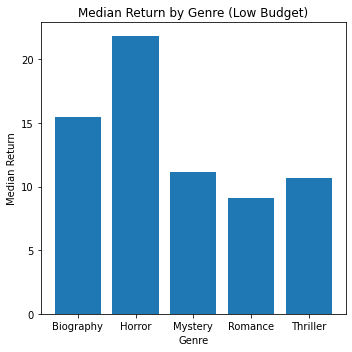

In [50]:
title = 'Median Return by Genre (Low Budget)'
Genre_Label = 'Genre'
Average_Return = 'Median Return'

figure, ax = plt.subplots(figsize=(5, 5))

Genres = low_final_gens
Returns = low_final_values

ax.bar(low_final_gens,low_final_values)
#plt.plot(my_series.index, my_series.values)
ax.set_xlabel(Genre_Label)
ax.set_ylabel(Average_Return)
ax.set_title(title)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

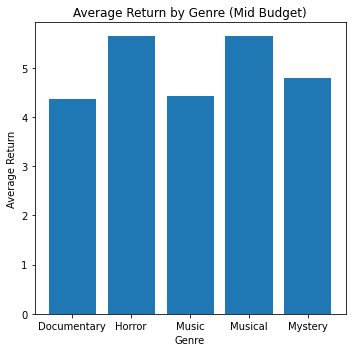

In [51]:
title = 'Average Return by Genre (Mid Budget)'
Genre_Label = 'Genre'
Average_Return = 'Average Return'

figure, ax = plt.subplots(figsize=(5, 5))

Genres = mid_final_gens
Returns = mid_final_values

ax.bar(mid_final_gens,mid_final_values)
#plt.plot(my_series.index, my_series.values)
ax.set_xlabel(Genre_Label)
ax.set_ylabel(Average_Return)
ax.set_title(title)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

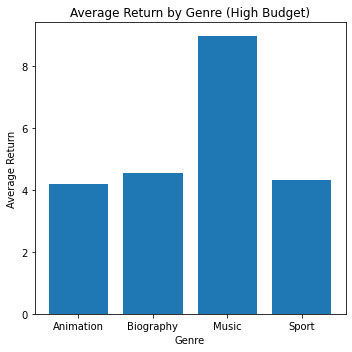

In [52]:
title = 'Average Return by Genre (High Budget)'
Genre_Label = 'Genre'
Average_Return = 'Average Return'

figure, ax = plt.subplots(figsize=(5, 5))

Genres = high_final_gens
Returns = high_final_values

ax.bar(high_final_gens,high_final_values)
#plt.plot(my_series.index, my_series.values)
ax.set_xlabel(Genre_Label)
ax.set_ylabel(Average_Return)
ax.set_title(title)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

The following code creates a count for each genre by budget, a count of money making films from each genre and then a percentage of movies in the genre that made money.

In [28]:
num_low_genres = low_budget_genres['genres'].value_counts()
num_low_genres = num_low_genres.to_frame().reset_index()

low_budget_genres_moneymaking = low_budget_genres[low_budget_genres['WW_success'] > 1]
num_low_budget_genres_moneymaking = low_budget_genres_moneymaking['genres'].value_counts()
num_low_budget_genres_moneymaking = num_low_budget_genres_moneymaking.to_frame().reset_index()
num_low_budget_genres_moneymaking= num_low_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

low_budget_ratio = pd.merge(num_low_genres, num_low_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
low_budget_ratio = low_budget_ratio.fillna(0)

low_budget_ratio['percentage_moneymaking'] = (low_budget_ratio['moneymake_count']/low_budget_ratio['count'])*100
low_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
10,Fantasy,5,5.0,100.000000
12,Music,3,3.0,100.000000
13,Biography,2,2.0,100.000000
14,Family,1,1.0,100.000000
5,Mystery,14,13.0,92.857143
2,Horror,24,22.0,91.666667
4,Romance,15,13.0,86.666667
8,Sci-Fi,6,5.0,83.333333
0,Drama,46,36.0,78.260870
1,Thriller,26,20.0,76.923077


In [29]:
num_mid_genres = mid_budget_genres['genres'].value_counts()
num_mid_genres = num_mid_genres.to_frame().reset_index()

mid_budget_genres_moneymaking = mid_budget_genres[mid_budget_genres['WW_success'] > 1]
num_mid_budget_genres_moneymaking = mid_budget_genres_moneymaking['genres'].value_counts()
num_mid_budget_genres_moneymaking = num_mid_budget_genres_moneymaking.to_frame().reset_index()
num_mid_budget_genres_moneymaking= num_mid_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

mid_budget_ratio = pd.merge(num_mid_genres, num_mid_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
mid_budget_ratio = mid_budget_ratio.fillna(0)

mid_budget_ratio['percentage_moneymaking'] = (mid_budget_ratio['moneymake_count']/mid_budget_ratio['count']) * 100
mid_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
21,News,1,1,100.000000
20,Musical,1,1,100.000000
11,Family,33,30,90.909091
1,Comedy,226,194,85.840708
8,Horror,67,57,85.074627
5,Romance,108,91,84.259259
9,Mystery,55,46,83.636364
13,History,28,23,82.142857
15,Documentary,21,17,80.952381
4,Thriller,115,93,80.869565


In [30]:
num_high_genres = high_budget_genres['genres'].value_counts()
num_high_genres = num_high_genres.to_frame().reset_index()

high_budget_genres_moneymaking = high_budget_genres[high_budget_genres['WW_success'] > 1]
num_high_budget_genres_moneymaking = high_budget_genres_moneymaking['genres'].value_counts()
num_high_budget_genres_moneymaking = num_high_budget_genres_moneymaking.to_frame().reset_index()
num_high_budget_genres_moneymaking= num_high_budget_genres_moneymaking.rename(columns = {'count':'moneymake_count'})

high_budget_ratio = pd.merge(num_high_genres, num_high_budget_genres_moneymaking, right_on = 'genres', left_on = 'genres', how = 'outer')
high_budget_ratio = high_budget_ratio.fillna(0)

high_budget_ratio['percentage_moneymaking'] = (high_budget_ratio['moneymake_count']/high_budget_ratio['count']) * 100
high_budget_ratio.sort_values(by = 'percentage_moneymaking', ascending = False)

,genres,count,moneymake_count,percentage_moneymaking
20,War,1,1,100.000000
11,Romance,14,14,100.000000
19,Music,2,2,100.000000
14,Documentary,11,11,100.000000
13,Mystery,14,14,100.000000
4,Animation,73,72,98.630137
5,Sci-Fi,59,58,98.305085
2,Comedy,117,113,96.581197
0,Adventure,217,204,94.009217
9,Family,31,29,93.548387


## Personel

In [31]:
#code showing analysis

# Recommendation 1 (High Risk High Reward Investments)

Budget: Lower budget films (<5mil)

Runtime: Shorter runtime (95ish minutes)

Genre recs: Horror, Biography

Writers: Oren Pelli, Christopher Landon, Andrew Gurland, Huck Botko, Eric Heisserer, Stephen Kendrick

Producers: Jason Blum, Marc Beinstock, Timur Bekmambetov, Andrew Form, Michael Bay, Brian Kavanaugh-Jones

Actors: Ethan Hawke, Mark Duplass, Marlon Wayans, Julianne Moore, Essence Atkins, John Hawkes

# Recommendation 2 (Middle Ground)

Budget: Medium budget films (5 mil - 50 mil)

Runtime: Runtime 105ish minutes

Genre recs: Musical, Horror

Writers: Gary Dauberman, John Green, Jeff Fradley, John J McLaughlin, Michael H Weber, Reid Carolin

Producers: Peter Safran, Brad Fuller, Andrew Form, Jason Blum, Peter Czernin, Michael Bay

Actors: Mila Kunis, Maggie Smith, Emma Stone, Bill Nighy, Octavia Spencer, Emily Blunt

# Recommendation 3 (Safest Investment)

Budget: Blockbuster films (budget > 50mil) 

Runtime: More flexibility with runtime (110ish minutes)

Genre recs: Music, Animation

Writers: Cinco Paul, Ken Daurio, Scott Rosenberg, Brian Lynch, E.L James, Niall Leonard

Producers: Janet Healey, Christopher Meledandri, John Kilik, Nina Jacobson, Michael Fotrell, Simon Kinberg

Actors: Kevin Hart, Kristen Wiig, Josh Gad, Steve Carell, Selena Gomez, Josh Hutcherson